<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 4. Обучение с учителем. Методы классификации
## <center>Практика. Переобучение, кривые валидации и обучения

In [8]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
%pylab inline
figsize(12, 8)
import seaborn as sns
from sklearn.svm import SVC
from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('../../scripts/')
from load_titanic_with_features import load_titanic

Populating the interactive namespace from numpy and matplotlib


In [2]:
X_train, y, X_test, = load_titanic("../../data/titanic_train.csv",
                                       "../../data/titanic_test.csv")


In [3]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,FamilyId
0,3,0,22.0,7.2500,0,1,1,-1
1,1,1,38.0,71.2833,1,1,3,-1
2,3,1,26.0,7.9250,0,0,2,-1
3,1,1,35.0,53.1000,0,1,3,-1
4,3,0,35.0,8.0500,0,0,1,-1


**Отшкалируйте выборку - создайте X_train_scaled и X_test_scaled.**

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
def plot_curve(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

In [6]:
def plot_learning_curve(C=1):
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(SVC(C=C),
                                                  X_train_scaled, y, train_sizes, cv=5)
    plot_curve(N_train, 1 - val_train, label='training scores')
    plot_curve(N_train, 1 - val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('error')
    plt.ylim(0, 0.4)
    plt.xlim(5, 800)
    plt.legend()

**Посмотрите, как использовать метод validation_curve и получите значения качества при 5-кратной кросс-валидации с SVM на обучающей и тестовой выборках для 100 значений параметра C от $10^{-3}$ до $10^2$.**

In [9]:
c_values = np.logspace(-3, 2, 100)
val_train, val_test = validation_curve(SVC(), X_train_scaled, y, 'C', c_values, cv=5)

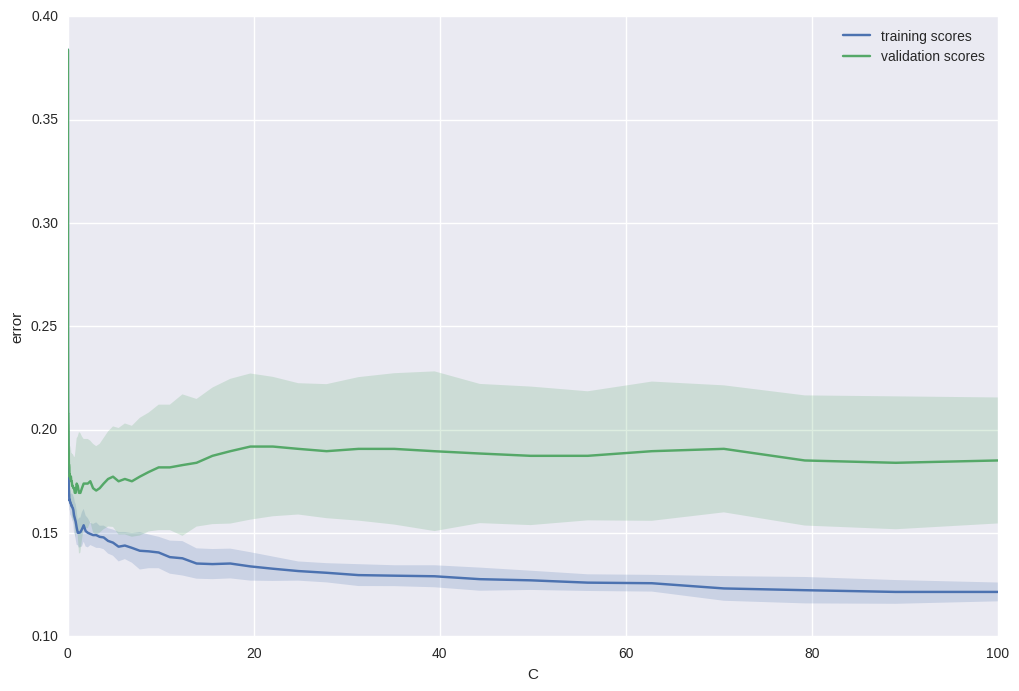

In [10]:
plot_curve(c_values, 1 - val_train, label='training scores')
plot_curve(c_values, 1 - val_test, label='validation scores')
plt.xlabel('C'); plt.ylabel('error')
plt.legend();

**Теперь то же самое, но для 100 значений C от 0.05 до 5. Проделайте это для масштабированной и не масштабированной выборки и сравните результаты.**

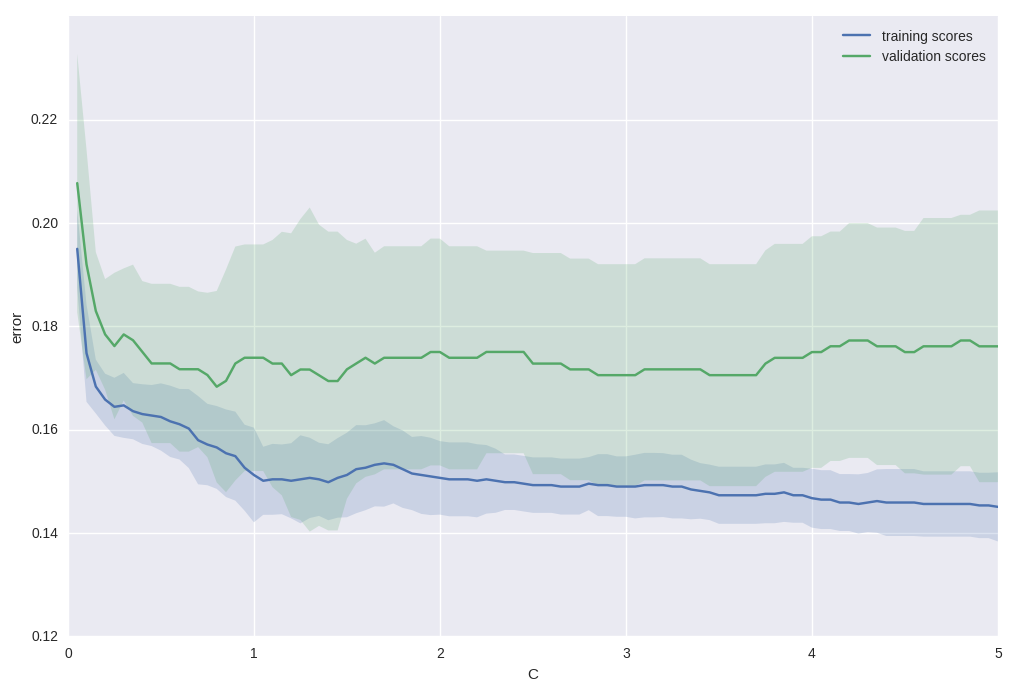

In [11]:
c_values = np.linspace(0.05, 5, 100)
val_train, val_test = validation_curve(SVC(), X_train_scaled, y, 'C', c_values, cv=5)
plot_curve(c_values, 1 - val_train, label='training scores')
plot_curve(c_values, 1 - val_test, label='validation scores')
plt.xlabel('C'); plt.ylabel('error')
plt.legend();

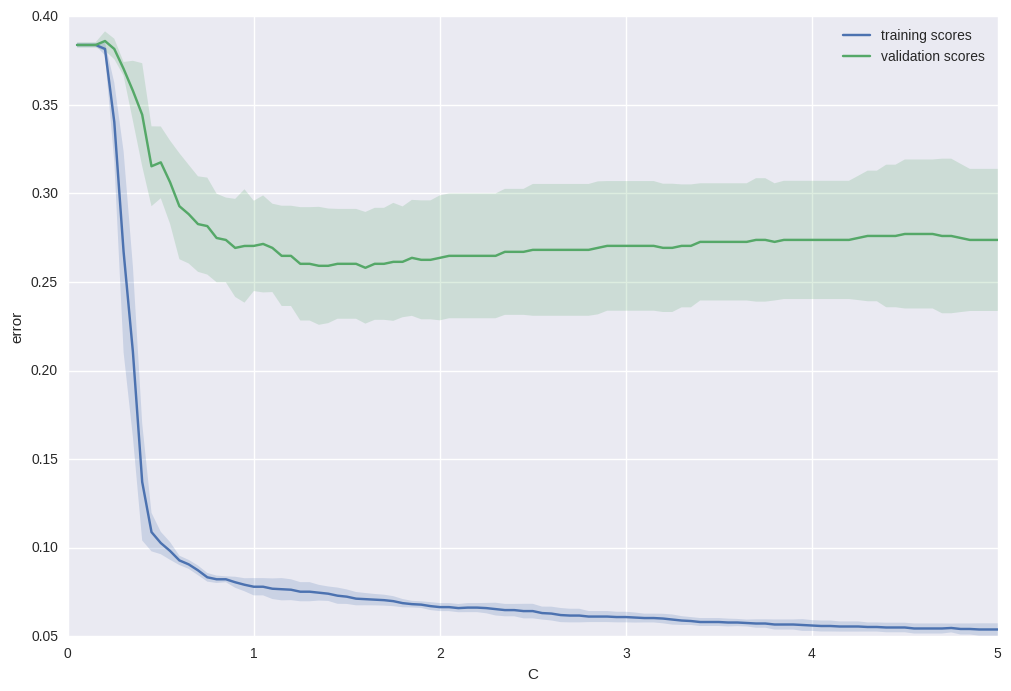

In [12]:
c_values = np.linspace(0.05, 5, 100)
val_train, val_test = validation_curve(SVC(), X_train, y, 'C', c_values, cv=5)
plot_curve(c_values, 1 - val_train, label='training scores')
plot_curve(c_values, 1 - val_test, label='validation scores')
plt.xlabel('C'); plt.ylabel('error')
plt.legend();

**Найдите оптимальное значение параметра регуляризации C из диапазона от 0.05 до 3 с помощью GridSearchCV.**

In [14]:
from sklearn.grid_search import GridSearchCV

params = {'C': np.linspace(0.05, 3, 100)}

best_clf = GridSearchCV(
                SVC(), 
                params, 
                verbose=True,
                n_jobs=-1,
                cv=5)

best_clf.fit(X_train_scaled, y)

# print best estimatior and params
print("Best params:", best_clf.best_params_)
print("Best cross validation accuracy", best_clf.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.7s


Best params: {'C': 0.76515151515151525}
Best cross validation accuracy 0.8316498316498316


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished


**Посмотрите на кривые обучения для значений $C\ 10^{-4}, 10^4$, а также для лучшего найденного с помощью GridSearchCV. Проинтерпретируйте полученные результаты.**

CPU times: user 1.31 s, sys: 0 ns, total: 1.31 s
Wall time: 1.31 s


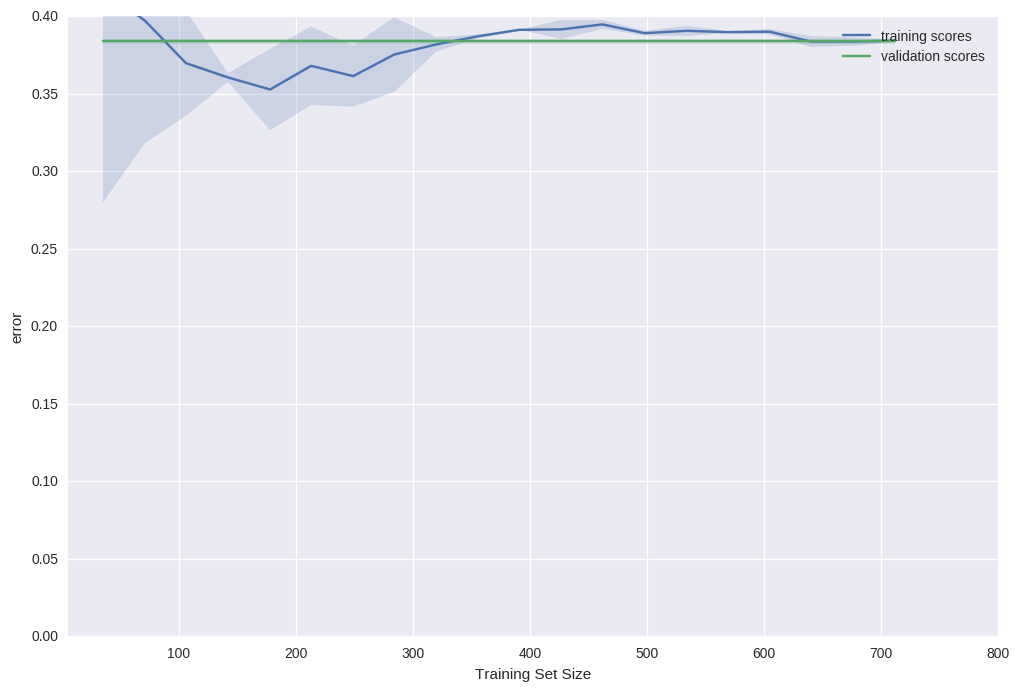

In [15]:
%%time
plot_learning_curve(1e-4) # недообучение

CPU times: user 1.01 s, sys: 0 ns, total: 1.01 s
Wall time: 1.01 s


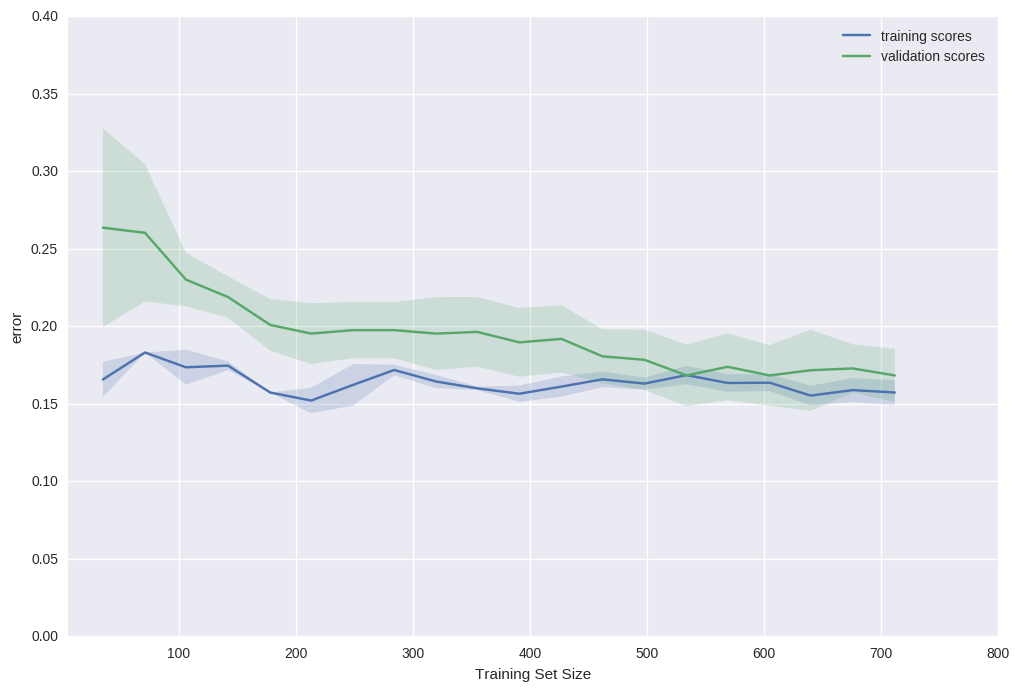

In [16]:
%%time
plot_learning_curve(best_clf.best_params_['C'])

CPU times: user 42.5 s, sys: 8 ms, total: 42.6 s
Wall time: 42.6 s


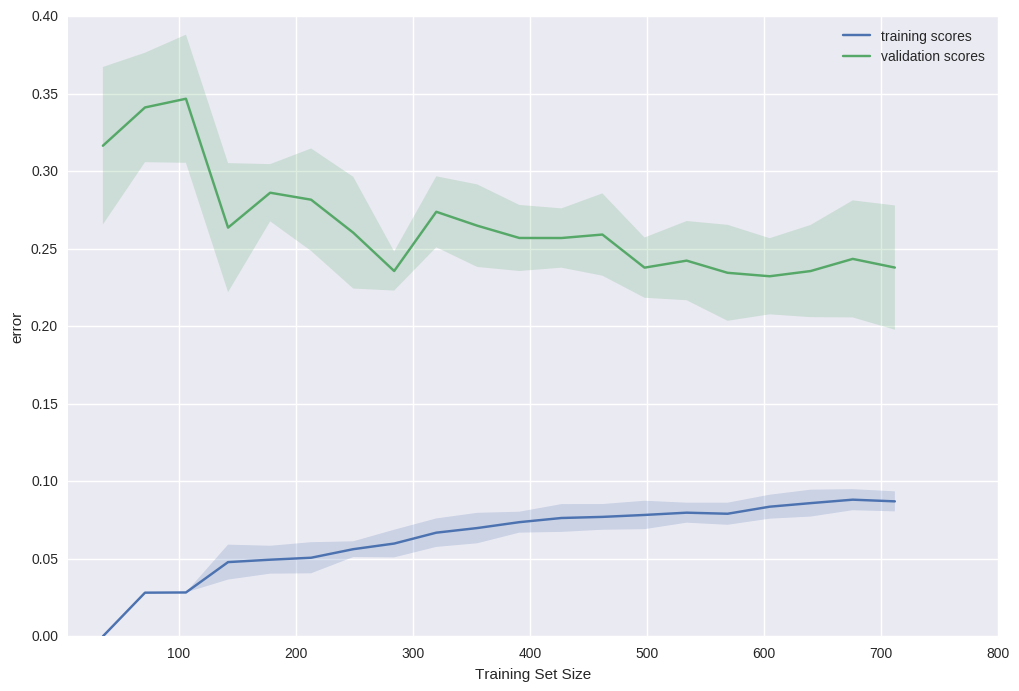

In [17]:
%%time
plot_learning_curve(1e4) # переобучение

**Запишем ответы в файл и отправим решение на Kaggle.**

In [18]:
# make predictions. This results in 0.7847 LB
predicted_labels = best_clf.predict(X_test_scaled)

# turn predictions into data frame and save as csv file
predicted_df = pd.DataFrame(predicted_labels,
                            index = np.arange(892, 892 + X_test_scaled.shape[0]),
                            columns=["Survived"])
predicted_df.to_csv("../../output/titanic_simple_svm.csv", index_label="PassengerId")